# Importing libararies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the dataset

In [2]:
data = pd.read_csv('googleplaystore_new.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",0.0,0,1.0,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",0.0,0,1.0,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",0.0,0,1.0,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",0.0,0,0.0,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",0.0,0,1.0,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Dataset information

### 1) Displaying rows and columns 

In [3]:
data.shape

(10841, 13)

### 2) Displaying the column names

In [4]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

### 3) Displaying data type of each column  

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            9146 non-null   object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  float64
 7   Price           10841 non-null  object 
 8   Content_Rating  10840 non-null  float64
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.1+ MB


### 4) displaying the number of null values

In [6]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Removing null values

In [7]:
data=data.dropna()

In [8]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [9]:
data.shape

(7723, 13)

### 5) Some stats on the dataset

In [10]:
data.describe()

,Rating,Type,Content_Rating
count,7723.000000,7723.000000,7723.000000
mean,4.173935,0.074712,1.018387
std,0.544638,0.262943,0.571646
min,1.000000,0.000000,0.000000
25%,4.000000,0.000000,1.000000
50%,4.300000,0.000000,1.000000
75%,4.500000,0.000000,1.000000
max,5.000000,1.000000,4.000000


### 6) Checking for duplicate values

In [11]:
print(data[data.duplicated()])

                                                   App      Category  Rating  \
256                                ZOOM Cloud Meetings      BUSINESS     4.4   
266                                           Zenefits      BUSINESS     4.2   
267                                         Google Ads      BUSINESS     4.3   
270                                 FreshBooks Classic      BUSINESS     4.1   
271                                      Insightly CRM      BUSINESS     3.8   
...                                                ...           ...     ...   
7885                   CT Scan Cross Sectional Anatomy       MEDICAL     4.3   
8632                              Notepad & To do list  PRODUCTIVITY     4.3   
8635   Polaris Office - Word, Docs, Sheets, Slide, PDF  PRODUCTIVITY     4.3   
10049        Airway Ex - Intubate. Anesthetize. Train.       MEDICAL     4.3   
10768                                             AAFP       MEDICAL     3.8   

      Reviews  Size     Installs  Type 

### PREROCESSING OF DATA

### Modifying Size column and removing M and converting into kb

In [12]:
print(data.Size.value_counts())

def change(Size):
    if 'M'in Size:
        x=Size[:-1]
        x=float(x)*1000
        return x

    elif 'k'in Size:
        x=Size[:-1]
        x=float(x)
        return x
    
    else: return None

    
data.Size=data.Size.map(change)
data.Size.value_counts()

14M     165
12M     161
11M     159
15M     159
13M     157
       ... 
8.5k      1
313k      1
478k      1
33k       1
78k       1
Name: Size, Length: 412, dtype: int64


14000.0    165
12000.0    161
15000.0    159
11000.0    159
13000.0    157
          ... 
957.0        1
975.0        1
412.0        1
887.0        1
485.0        1
Name: Size, Length: 411, dtype: int64

### Modifying Installs column and removing , + symbol

In [13]:
data.Reviews=data.Reviews.astype('float')

print(data.Installs.value_counts()[:5])
data.Installs=data.Installs.map(lambda x:x.replace(',','').replace('+',''))
print(data.Installs.value_counts()[:5])
data.Installs=data.Installs.astype('float')

print(data.Price.value_counts()[:5])
data.Price=data.Price.map(lambda x:x.replace('$',''))
print(data.Price.value_counts()[:5])
data.Price=data.Price.astype('float')

print(data.dtypes)

1,000,000+     1301
100,000+       1037
10,000+         968
10,000,000+     825
1,000+          689
Name: Installs, dtype: int64
1000000     1301
100000      1037
10000        968
10000000     825
1000         689
Name: Installs, dtype: int64
0        7146
$0.99     105
$2.99     101
$4.99      63
$1.99      53
Name: Price, dtype: int64
0       7146
0.99     105
2.99     101
4.99      63
1.99      53
Name: Price, dtype: int64
App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type              float64
Price             float64
Content_Rating    float64
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


### Changing Data types of other columns

In [14]:
data["Content_Rating"] = pd.to_numeric(data["Content_Rating"])

In [15]:
data.Content_Rating=data.Content_Rating.astype('int')
data.Price=data.Price.astype('int')
data.Type=data.Type.astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7723 non-null   object 
 1   Category        7723 non-null   object 
 2   Rating          7723 non-null   float64
 3   Reviews         7723 non-null   float64
 4   Size            7723 non-null   float64
 5   Installs        7723 non-null   float64
 6   Type            7723 non-null   int32  
 7   Price           7723 non-null   int32  
 8   Content_Rating  7723 non-null   int32  
 9   Genres          7723 non-null   object 
 10  Last Updated    7723 non-null   object 
 11  Current Ver     7723 non-null   object 
 12  Android Ver     7723 non-null   object 
dtypes: float64(4), int32(3), object(6)
memory usage: 754.2+ KB


### 7.) Checking the correlation of attributes with each other

In [16]:
data.corr()

,Rating,Reviews,Size,Installs,Type,Price,Content_Rating
Rating,1.000000,0.079819,0.083640,0.052693,0.041180,-0.021940,-0.007237
Reviews,0.079819,1.000000,0.240382,0.626187,-0.043887,-0.009618,0.103743
Size,0.083640,0.240382,1.000000,0.162707,-0.028124,-0.026086,0.039086
Installs,0.052693,0.626187,0.162707,1.000000,-0.047260,-0.010242,0.037471
Type,0.041180,-0.043887,-0.028124,-0.047260,1.000000,0.215167,0.016706
Price,-0.021940,-0.009618,-0.026086,-0.010242,0.215167,1.000000,-0.005465
Content_Rating,-0.007237,0.103743,0.039086,0.037471,0.016706,-0.005465,1.000000


### 8) Applying Machine Learning Techniques

In [17]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

### Applying K- means

In [18]:
x = data.iloc[:,[2,3,4,5,6,7,8]].values     #Rating, Review, Size, Installs, Type, Price, Content_Rating 

### Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x)

### Applying PCA

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x = pca.fit_transform(x)
explained_variance = pca.explained_variance_ratio_


In [21]:
print(explained_variance)

[0.25386365 0.17316263]


### Elbow Method

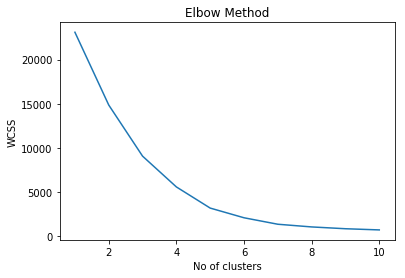

In [22]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 30)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 30)
kmeans.fit(x)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([0, 0, 0, ..., 0, 0, 0])

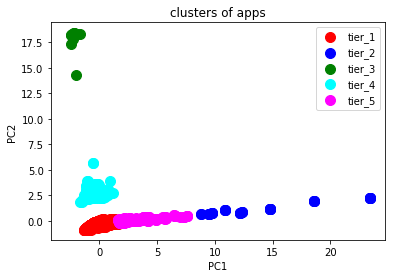

In [24]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=100, c = 'red', label = 'tier_1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=100, c = 'blue', label = 'tier_2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=100, c = 'green', label = 'tier_3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s=100, c = 'cyan', label = 'tier_4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s=100, c = 'magenta', label = 'tier_5')
plt.title("clusters of apps")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

### HIERARCHICAL CLUSTERING

In [25]:
x = data.iloc[:,[2,5]].values  #Rating ...&... #Installs

### Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x)
print(x)

[[-0.13575945 -0.16776413]
 [-0.50299945 -0.15799426]
 [ 0.96596057 -0.06827091]
 ...
 [ 0.59872056 -0.16786382]
 [ 1.51682058 -0.16796152]
 [ 0.59872056  0.03142171]]


In [27]:
import scipy.cluster.hierarchy as sch

### Dendrogram

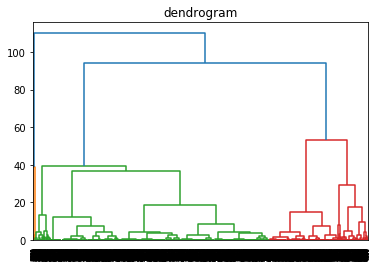

In [28]:
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('dendrogram')
plt.show()

### Training The Model

In [29]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

### Visualising The Clusters

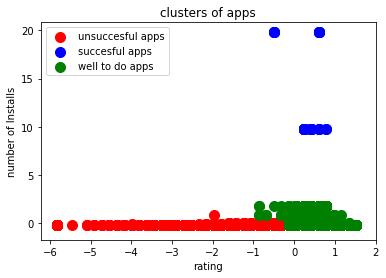

In [31]:
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s=100, c = 'red', label = 'unsuccesful apps')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s=100, c = 'blue', label = 'succesful apps')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s=100, c = 'green', label = 'well to do apps')
plt.title("clusters of apps")
plt.xlabel("rating")
plt.ylabel("number of Installs")
plt.legend()
plt.show()

### EXTENDING HEIRARCHICAL CLUSTERING TO MORE COLUMNS

In [32]:
x = data.iloc[:,[2,3,4,5,6,7,8]].values   #Rating, Review, Size, Installs, Type, Price, Content_Rating 

In [33]:
from sklearn import preprocessing
x = preprocessing.normalize(x)
x

array([[1.90950798e-04, 7.40516509e-03, 8.84893942e-01, ...,
        0.00000000e+00, 0.00000000e+00, 4.65733654e-05],
       [7.79692963e-06, 1.93323870e-03, 2.79889781e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.99921272e-06],
       [9.39854640e-07, 1.74992935e-02, 1.73973093e-03, ...,
        0.00000000e+00, 0.00000000e+00, 1.99969072e-07],
       ...,
       [8.45303133e-05, 7.13811534e-04, 9.95579245e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.87845141e-05],
       [1.38835111e-03, 1.11068089e-03, 9.99612802e-01, ...,
        0.00000000e+00, 0.00000000e+00, 2.77670223e-04],
       [4.49642655e-07, 3.97990704e-02, 1.89849121e-03, ...,
        0.00000000e+00, 0.00000000e+00, 9.99205900e-08]])

In [34]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x)

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x = pca.fit_transform(x)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)


[0.40367301 0.26052881]


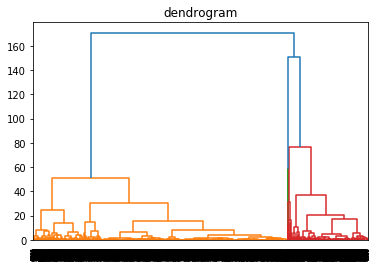

In [36]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('dendrogram')
plt.show()

In [37]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

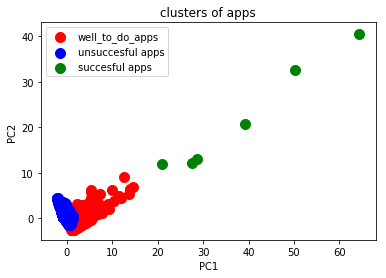

In [39]:
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s=100, c = 'red', label = 'well_to_do_apps')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s=100, c = 'blue', label = 'unsuccesful apps')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s=100, c = 'green', label = 'succesful apps')
plt.title("clusters of apps")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

In [54]:
x = data.iloc[:,[4,5,6]].values  # Size, Installs and Type

In [55]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x)
x

array([[-0.16932947, -0.16776413, -0.28415572],
       [-0.38256626, -0.15799426, -0.28415572],
       [-0.60859727, -0.06827091, -0.28415572],
       ...,
       [ 1.28068074, -0.16786382, -0.28415572],
       [-0.8260988 , -0.16796152, -0.28415572],
       [-0.16932947,  0.03142171, -0.28415572]])

In [45]:
#from sklearn import preprocessing
#x = preprocessing.normalize(x)
#x

array([[-0.45654512, -0.45232467, -0.76613899],
       [-0.76199408, -0.31469238, -0.56598032],
       [-0.90145641, -0.10112311, -0.42089245],
       ...,
       [ 0.96836212, -0.126927  , -0.21485888],
       [-0.92861438, -0.18880488, -0.31941831],
       [-0.50961197,  0.0945664 , -0.8551917 ]])

In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x = pca.fit_transform(x)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)


[0.39288615 0.32840939]


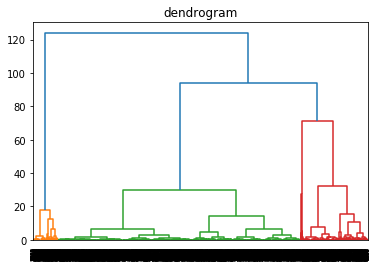

In [57]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('dendrogram')
plt.show()

In [58]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

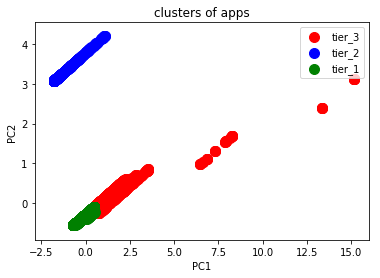

In [60]:
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s=100, c = 'red', label = 'tier_3')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s=100, c = 'blue', label = 'tier_2')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s=100, c = 'green', label = 'tier_1')
plt.title("clusters of apps")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

In [66]:
x = data.iloc[:,[5,6]].values # Installs and Types

In [67]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x)
x

array([[-0.16776413, -0.28415572],
       [-0.15799426, -0.28415572],
       [-0.06827091, -0.28415572],
       ...,
       [-0.16786382, -0.28415572],
       [-0.16796152, -0.28415572],
       [ 0.03142171, -0.28415572]])

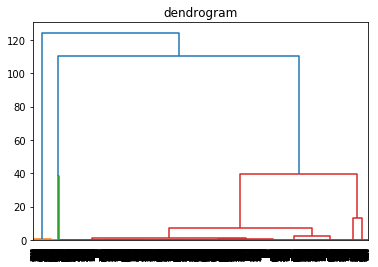

In [68]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('dendrogram')
plt.show()

In [64]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

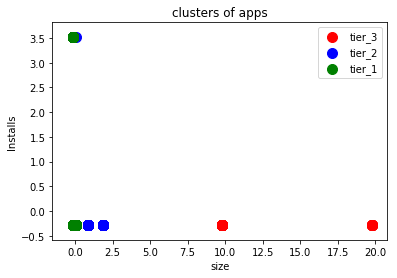

In [69]:
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s=100, c = 'red', label = 'tier_3')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s=100, c = 'blue', label = 'tier_2')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s=100, c = 'green', label = 'tier_1')
plt.title("clusters of apps")
plt.xlabel("size")
plt.ylabel("Installs")
plt.legend()
plt.show()